Задача 2.

In [163]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

In [164]:
from scipy import stats
from scipy.stats import skew as scipy_skew
from scipy.stats import gaussian_kde

# устанавливаем объем выборки
n = 25
# создаем выборку
sample = np.random.exponential(scale=1, size=n)
sample_sorted = np.sort(sample)
print("Получена следующая выборка (отсортирована по возрастанию):")
print(sample_sorted)


Получена следующая выборка (отсортирована по возрастанию):
[0.02079931 0.05983877 0.15023453 0.16959629 0.16962487 0.20067899
 0.20261142 0.23868763 0.34422299 0.34551551 0.36275373 0.45627722
 0.46926809 0.56553707 0.60893469 0.74392783 0.91294255 0.91908215
 0.94637087 1.23125006 1.31674569 1.78642954 2.01123086 3.01012143
 3.50355748]


In [165]:
# вычисляем медиану
median = np.median(sample_sorted)
print(f"Медиана = {median}")

Медиана = 0.4692680899768591


In [166]:
# Вычисляем размах
min_el = np.min(sample_sorted)
max_el = np.max(sample_sorted)

width = max_el - min_el

print (f"Размах = {width}") 

Размах = 3.4827581671591736


In [167]:
# расчет коэффициента ассиметрии

print(f"Коэффициент ассиметри = {scipy_skew(sample_sorted):.4f}")

Коэффициент ассиметри = 1.6998


In [168]:
print(sample_sorted)
# Строим гистограмму и разбиваем на интервалы)
bins_count = 8
counts, bin_edges = np.histogram(sample_sorted, bins=bins_count)
print(f"Количество значений в интервале по порядку: {counts}")
print(f"Вершины-границы интервалов: {bin_edges}")

# Находим интервал с максимальной частотой
mode_bin_index = np.argmax(counts)  # индекс этого интервала
max_frequency = counts[mode_bin_index]  # максимальная частота

# Определяем границы этого интервала
mode_bin_start = bin_edges[mode_bin_index]
mode_bin_end = bin_edges[mode_bin_index + 1]

# Оценка моды - середина модального интервала
mode_estimate = (mode_bin_start + mode_bin_end) / 2
print(f"\nМода = {mode_estimate}")


[0.02079931 0.05983877 0.15023453 0.16959629 0.16962487 0.20067899
 0.20261142 0.23868763 0.34422299 0.34551551 0.36275373 0.45627722
 0.46926809 0.56553707 0.60893469 0.74392783 0.91294255 0.91908215
 0.94637087 1.23125006 1.31674569 1.78642954 2.01123086 3.01012143
 3.50355748]
Количество значений в интервале по порядку: [11  5  5  0  2  0  1  1]
Вершины-границы интервалов: [0.02079931 0.45614408 0.89148885 1.32683362 1.76217839 2.19752316
 2.63286793 3.0682127  3.50355748]

Мода = 0.23847169344658697


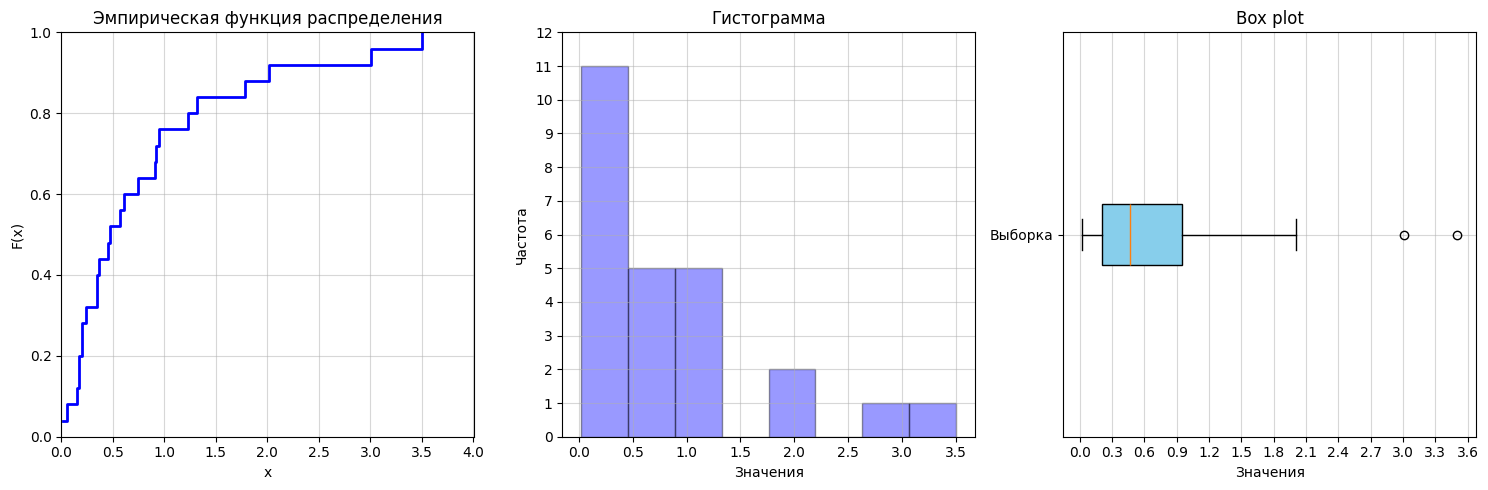

Основные статистики:
Медиана: 0.469
Квартили: Q1=0.203, Q3=0.946
Минимум: 0.021, Максимум: 3.504


In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. Эмпирическая функция распределения
ax = axes[0]
# Значения ЭФР: от 0 до 1 с шагом 1/n
y = np.arange(1, n+1) / n

# Рисуем ступенчатую функцию
ax.step(sample_sorted, y, where='post', color='blue', linewidth=2)

ax.set_xlabel('x')
ax.set_ylabel('F(x)')
ax.set_title('Эмпирическая функция распределения')
ax.grid(True, alpha=0.5)
ax.set_xlim(0, max(sample) + 0.5)
ax.set_ylim(0, 1)

# ===== 2. Гистограмма =====
ax = axes[1]
ax.hist(sample, bins=8, alpha=0.4, color='blue', edgecolor='black')
ax.set_xlabel('Значения')
ax.set_ylabel('Частота')
ax.set_yticks(np.arange(0, max(counts) + 2, 1))
ax.set_title('Гистограмма')
ax.grid(True, alpha=0.5)

# ===== 3. Box plot =====
ax = axes[2]
box = ax.boxplot(sample, patch_artist=True, vert=False)
box['boxes'][0].set_facecolor('skyblue')
ax.set_yticklabels(['Выборка'])
ax.set_xlabel('Значения')
ax.set_xticks(np.arange(0, np.max(sample)+0.1, 0.3))
ax.set_title('Box plot')
ax.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

# Выводим основные статистики
print("Основные статистики:")
print(f"Медиана: {np.median(sample):.3f}")
print(f"Квартили: Q1={np.percentile(sample, 25):.3f}, Q3={np.percentile(sample, 75):.3f}")
print(f"Минимум: {np.min(sample):.3f}, Максимум: {np.max(sample):.3f}")